In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [150]:
df = pd.read_csv("StudentsPerformance.csv")

In [64]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [65]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [151]:
df = df.rename(columns={"math score":"mathscore", "reading score":"readingscore","test preparation course":"testprepcourse","writing score":"writingscore"})

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   testprepcourse               1000 non-null   object
 5   mathscore                    1000 non-null   int64 
 6   readingscore                 1000 non-null   int64 
 7   writingscore                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [68]:
q1=df.mathscore.quantile(0.25)
q3=df.mathscore.quantile(0.75)
q1,q3

(57.0, 77.0)

In [69]:
IQR=q3-q1
IQR

20.0

In [70]:
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
lower_limit,upper_limit

(27.0, 107.0)

In [75]:
df[(df['mathscore']<lower_limit)|(df['mathscore']>upper_limit)]

,gender,race/ethnicity,parental level of education,lunch,testprepcourse,mathscore,readingscore,writingscore
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


In [76]:
df = df[(df['mathscore']>lower_limit)&(df['mathscore']<upper_limit)]


In [77]:
df.describe()


,mathscore,readingscore,writingscore
count,990.000000,990.000000,990.000000
mean,66.560606,69.533333,68.443434
std,14.465952,14.194247,14.745921
min,28.000000,23.000000,15.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [84]:
df['zscore']=(df['mathscore'] - df['mathscore'].mean())/(df['mathscore'].std())

In [83]:
df

,gender,race/ethnicity,parental level of education,lunch,testprepcourse,mathscore,readingscore,writingscore,zscore
0,female,group B,bachelor's degree,standard,none,72,72,74,0.376014
1,female,group C,some college,standard,completed,69,90,88,0.168630
2,female,group B,master's degree,standard,none,90,95,93,1.620315
3,male,group A,associate's degree,free/reduced,none,47,57,44,-1.352182
4,male,group C,some college,standard,none,76,78,75,0.652525
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1.482059
996,male,group C,high school,free/reduced,none,62,55,55,-0.315265
997,female,group C,high school,free/reduced,completed,59,71,65,-0.522648
998,female,group D,some college,standard,completed,68,78,77,0.099502


<Axes: >

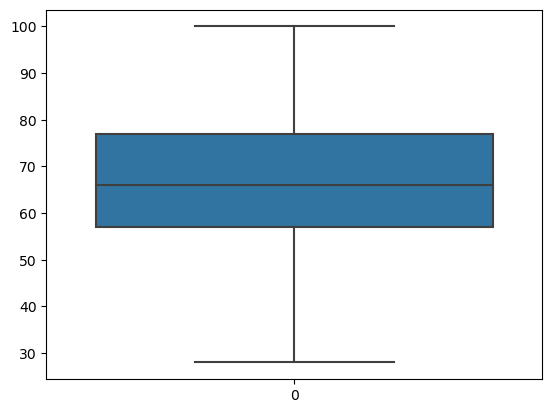

In [87]:
sns.boxplot(df['mathscore'])

<Axes: >

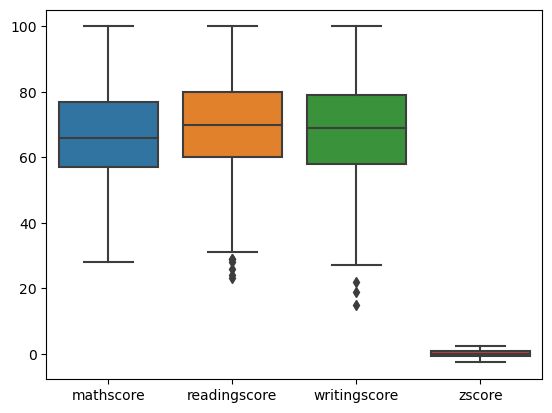

In [88]:
sns.boxplot(df)

In [93]:
q1_rs = df['readingscore'].quantile(0.25)
q3_rs = df['readingscore'].quantile(0.75)
q1_rs,q3_rs

(60.0, 80.0)

In [94]:
IQR_rs = q3_rs - q1_rs
IQR_rs

20.0

In [97]:
upper_limit = q3+(1.5*IQR_rs)
lower_limit = q1-(1.5*IQR_rs)
lower_limit,upper_limit

(30.0, 107.0)

In [101]:
df[(df['readingscore']<lower_limit)|(df['readingscore']>upper_limit)]

,gender,race/ethnicity,parental level of education,lunch,testprepcourse,mathscore,readingscore,writingscore,zscore
76,male,group E,some high school,standard,none,30,26,22,-2.527356
211,male,group C,some college,free/reduced,none,35,28,27,-2.181717
327,male,group A,some college,free/reduced,none,28,23,19,-2.665611
596,male,group B,high school,free/reduced,none,30,24,15,-2.527356
601,female,group C,high school,standard,none,29,29,30,-2.596484
896,male,group B,high school,free/reduced,none,36,29,27,-2.112589


In [102]:
df = df[(df['readingscore']>lower_limit)&(df['readingscore']<upper_limit)]

In [103]:
df

,gender,race/ethnicity,parental level of education,lunch,testprepcourse,mathscore,readingscore,writingscore,zscore
0,female,group B,bachelor's degree,standard,none,72,72,74,0.376014
1,female,group C,some college,standard,completed,69,90,88,0.168630
2,female,group B,master's degree,standard,none,90,95,93,1.620315
3,male,group A,associate's degree,free/reduced,none,47,57,44,-1.352182
4,male,group C,some college,standard,none,76,78,75,0.652525
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1.482059
996,male,group C,high school,free/reduced,none,62,55,55,-0.315265
997,female,group C,high school,free/reduced,completed,59,71,65,-0.522648
998,female,group D,some college,standard,completed,68,78,77,0.099502


<Axes: >

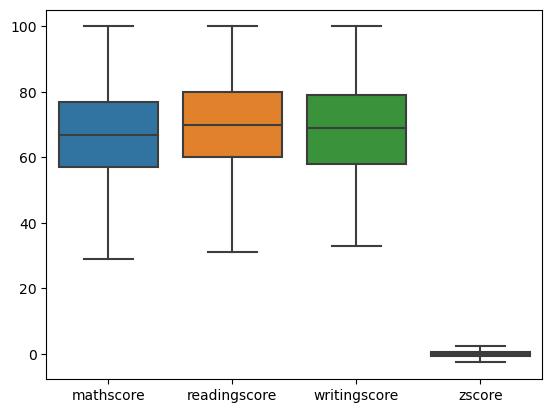

In [105]:
sns.boxplot(df)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       984 non-null    object 
 1   race/ethnicity               984 non-null    object 
 2   parental level of education  984 non-null    object 
 3   lunch                        984 non-null    object 
 4   testprepcourse               984 non-null    object 
 5   mathscore                    984 non-null    int64  
 6   readingscore                 984 non-null    int64  
 7   writingscore                 984 non-null    int64  
 8   zscore                       984 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 109.2+ KB


In [116]:
df['gender'] = df['gender'].astype('category')

In [117]:
df['race/ethnicity'] = df['race/ethnicity'].astype('category')

In [118]:
df['parental level of education'] = df['parental level of education'].astype('category')

In [119]:
df['lunch'] = df['lunch'].astype('category')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       984 non-null    category
 1   race/ethnicity               984 non-null    category
 2   parental level of education  984 non-null    category
 3   lunch                        984 non-null    category
 4   testprepcourse               984 non-null    category
 5   mathscore                    984 non-null    int64   
 6   readingscore                 984 non-null    int64   
 7   writingscore                 984 non-null    int64   
 8   zscore                       984 non-null    float64 
dtypes: category(5), float64(1), int64(3)
memory usage: 76.3 KB


In [121]:
df['testprepcourse'] = df['testprepcourse'].astype('category')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       984 non-null    category
 1   race/ethnicity               984 non-null    category
 2   parental level of education  984 non-null    category
 3   lunch                        984 non-null    category
 4   testprepcourse               984 non-null    category
 5   mathscore                    984 non-null    int64   
 6   readingscore                 984 non-null    int64   
 7   writingscore                 984 non-null    int64   
 8   zscore                       984 non-null    float64 
dtypes: category(5), float64(1), int64(3)
memory usage: 76.3 KB


In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [146]:
x = df[['mathscore']]
x

,mathscore
0,0.605634
1,0.563380
2,0.859155
3,0.253521
4,0.661972
...,...
995,0.830986
996,0.464789
997,0.422535
998,0.549296


In [147]:
scaler.fit(df[['mathscore']])


MinMaxScaler()

In [130]:
scaler.data_max_

array([100.])

In [131]:
scaler.data_min_

array([29.])

In [142]:
df['mathscore'] = scaler.transform(df[['mathscore']])


In [143]:
df

,gender,race/ethnicity,parental level of education,lunch,testprepcourse,mathscore,readingscore,writingscore,zscore
0,female,group B,bachelor's degree,standard,none,0.605634,72,74,0.376014
1,female,group C,some college,standard,completed,0.563380,90,88,0.168630
2,female,group B,master's degree,standard,none,0.859155,95,93,1.620315
3,male,group A,associate's degree,free/reduced,none,0.253521,57,44,-1.352182
4,male,group C,some college,standard,none,0.661972,78,75,0.652525
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.830986,99,95,1.482059
996,male,group C,high school,free/reduced,none,0.464789,55,55,-0.315265
997,female,group C,high school,free/reduced,completed,0.422535,71,65,-0.522648
998,female,group D,some college,standard,completed,0.549296,78,77,0.099502


<Axes: xlabel='mathscore', ylabel='Count'>

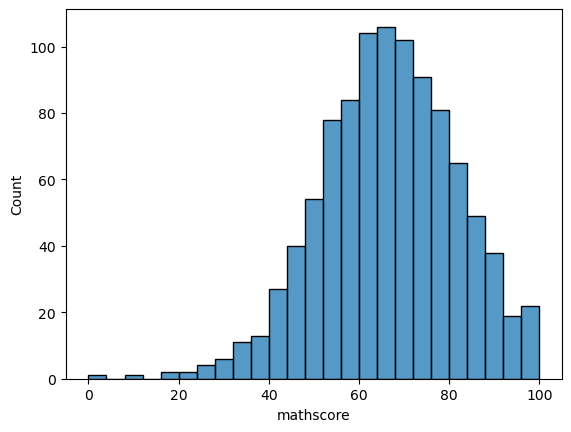

In [156]:
sns.histplot(data=df, x = 'mathscore')


<Axes: xlabel='readingscore', ylabel='Count'>

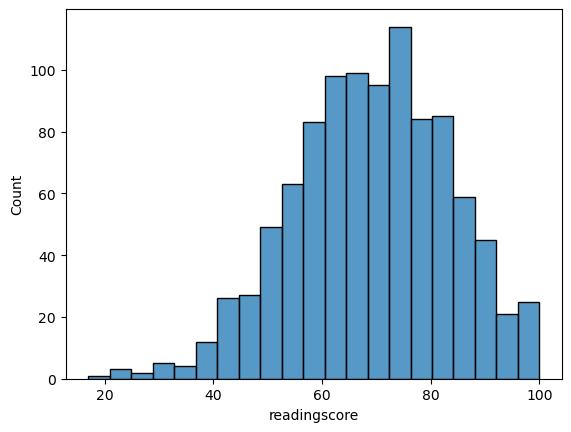

In [155]:
sns.histplot(data=df, x = 'readingscore')